# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [7]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkbayes2

import pandas as pd

import thinkplot

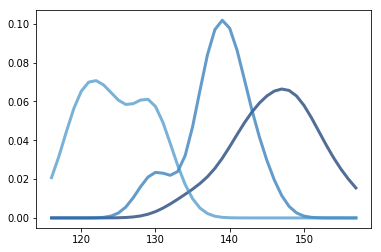

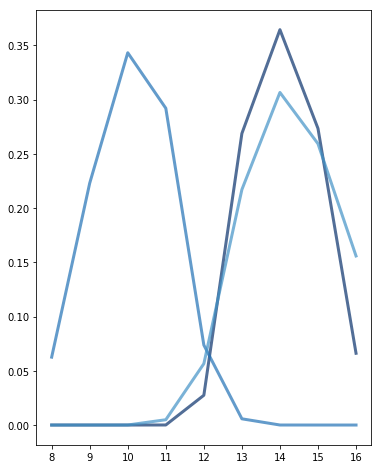

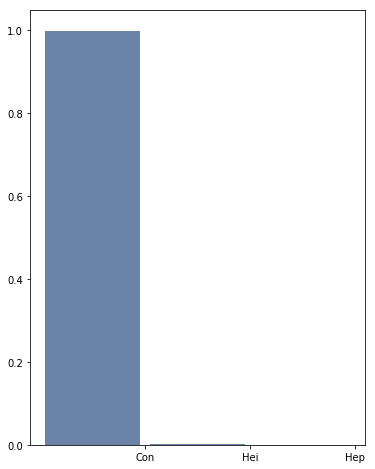

In [91]:
df = pd.read_csv('../data/flea_beetles.csv', delimiter='\t')
species = df.Species.tolist();
names = ['Con','Hep','Hei'];
angles = df.Angle.tolist();
widths = df.Width.tolist();

minW=min(widths)
maxW=max(widths)
nW=maxW-minW+1

minA=min(angles)
maxA=max(angles)
nA=maxA-minA+1

conW = thinkbayes2.EstimatedPdf([w for s,w in zip(species,widths) if s=='Con']).MakePmf(low=minW,high=maxW,n=nW,label='Con');
conA = thinkbayes2.EstimatedPdf([w for s,w in zip(species,angles) if s=='Con']).MakePmf(low=minA,high=maxA,n=nA,label='Con');

hepW = thinkbayes2.EstimatedPdf([w for s,w in zip(species,widths) if s=='Hep']).MakePmf(low=minW,high=maxW,n=nW,label='Hep');
hepA = thinkbayes2.EstimatedPdf([w for s,w in zip(species,angles) if s=='Hep']).MakePmf(low=minA,high=maxA,n=nA,label='Hep');

heiW = thinkbayes2.EstimatedPdf([w for s,w in zip(species,widths) if s=='Hei']).MakePmf(low=minW,high=maxW,n=nW,label='Hei');
heiA = thinkbayes2.EstimatedPdf([w for s,w in zip(species,angles) if s=='Hei']).MakePmf(low=minA,high=maxA,n=nA,label='Hei');

class beetle(Suite):
    def Likelihood(self, data, hypo):
        w,a = data;
        if hypo=='Con':
            return conW.Prob(w)*conA.Prob(a)
        elif hypo=='Hep':
            return hepW.Prob(w)*hepA.Prob(a)
        elif hypo=='Hei':
            return heiW.Prob(w)*heiA.Prob(a)
        print('here')

        
thinkplot.Pdf(conW)
thinkplot.Pdf(hepW)
thinkplot.Pdf(heiW)
thinkplot.figure()
thinkplot.Pdf(conA)
thinkplot.Pdf(hepA)
thinkplot.Pdf(heiA)
thinkplot.figure()
beetles = beetle(names);
beetles.Update((140,15))
thinkplot.hist(beetles)

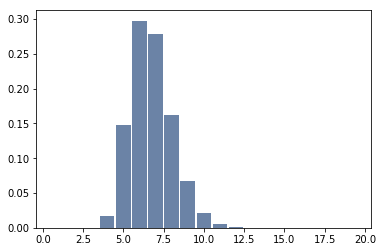

In [145]:
die = Pmf([1,0]);
roll = sum([die]*4);

class ur(Suite):
    def Likelihood(self, data, hypo):
        nTurns = hypo
        dist = sum([roll]*nTurns)
        return dist.Prob(data)
    
turns = ur(range(1,20));
turns.Update(13)
thinkplot.hist(turns)